In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["mag"], errors='ignore')  # Features
y = df_cleaned["mag"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

# Print results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Model: Linear Regression
MAE: 0.5028
MSE: 0.4198
R² Score: 0.7723

Model: Random Forest
MAE: 0.2603
MSE: 0.1377
R² Score: 0.9253

Model: Support Vector Regressor
MAE: 0.3202
MSE: 0.1986
R² Score: 0.8923


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9138 entries, 0 to 9137
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9138 non-null   object 
 1   latitude         9138 non-null   float64
 2   longitude        9138 non-null   float64
 3   depth            9138 non-null   float64
 4   mag              9138 non-null   float64
 5   magType          9138 non-null   object 
 6   nst              7595 non-null   float64
 7   gap              7595 non-null   float64
 8   dmin             7595 non-null   float64
 9   rms              9138 non-null   float64
 10  net              9138 non-null   object 
 11  id               9138 non-null   object 
 12  updated          9138 non-null   object 
 13  place            9138 non-null   object 
 14  type             9138 non-null   object 
 15  horizontalError  7018 non-null   float64
 16  depthError       9138 non-null   float64
 17  magError      

In [10]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-13T02:11:39.139Z,61.4143,-151.226300,60.80,1.90,ml,NaN,NaN,NaN,0.4500,...,2025-02-13T02:13:34.057Z,"31 km NNW of Beluga, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
1,2025-02-13T02:04:00.854Z,37.3001,-117.676300,0.00,0.90,ml,11.0,126.01,0.071000,0.4160,...,2025-02-13T02:06:28.767Z,"50 km S of Silver Peak, Nevada",earthquake,NaN,4.70,0.14,7.0,automatic,nn,nn
2,2025-02-13T01:51:29.710Z,38.8190,-122.841835,1.95,1.12,md,10.0,130.00,0.006719,0.0100,...,2025-02-13T01:53:07.869Z,"9 km NW of The Geysers, CA",earthquake,0.38,0.67,0.37,13.0,automatic,nc,nc
3,2025-02-13T01:38:10.812Z,68.7926,-145.663800,0.00,2.60,ml,NaN,NaN,NaN,0.8600,...,2025-02-13T01:47:01.040Z,"74 km N of Arctic Village, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
4,2025-02-13T01:32:59.712Z,37.3111,-117.656900,3.30,2.10,ml,27.0,109.27,0.079000,0.4503,...,2025-02-13T01:35:22.102Z,"49 km S of Silver Peak, Nevada",earthquake,NaN,1.00,0.19,19.0,automatic,nn,nn


In [11]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9138.000000,9138.000000,9138.000000,9138.000000,7595.000000,7595.000000,7595.000000,9138.000000,7018.000000,9138.000000,7580.000000,7593.000000
mean,40.549573,-109.245705,19.778724,1.509338,24.373930,111.550607,0.482186,0.275761,1.670632,2.112038,0.176995,19.006190
std,18.139280,66.117686,51.841300,1.360510,22.905096,63.816478,1.820397,0.302301,3.109692,5.857155,0.103029,27.444111
min,-73.220400,-179.937500,-3.460000,-1.890000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.094250,-149.213400,2.480000,0.720000,9.000000,65.000000,0.013825,0.070000,0.260000,0.450000,0.108000,7.000000
50%,38.819667,-122.716331,7.080000,1.300000,17.000000,91.000000,0.052360,0.160000,0.420000,0.760000,0.160000,12.000000
75%,57.031625,-115.959275,12.692500,1.920000,30.000000,146.000000,0.121400,0.400000,0.951239,1.650000,0.220000,22.000000
max,82.479300,179.971600,690.121000,7.600000,234.000000,348.000000,29.638000,4.950000,35.720000,310.100000,2.630000,703.000000


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["mag"], errors='ignore')  # Features
y = df_cleaned["mag"]  # Target variable (Magnitude)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Accuracy metric for regression
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score (Accuracy)": r2}

# Print results
for model, metrics in results.items():
    print(f"\n🔹 Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



🔹 Model: Random Forest
MAE: 0.2603
MSE: 0.1377
R² Score (Accuracy): 0.9253

🔹 Model: Support Vector Regressor
MAE: 0.3202
MSE: 0.1986
R² Score (Accuracy): 0.8923


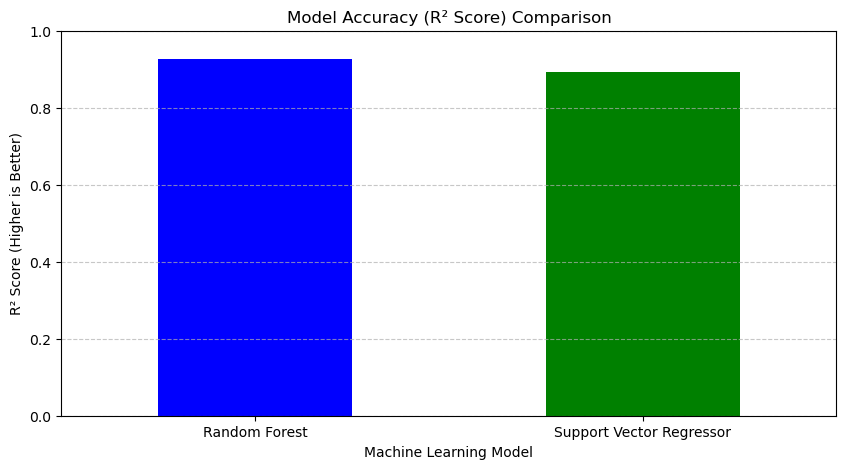

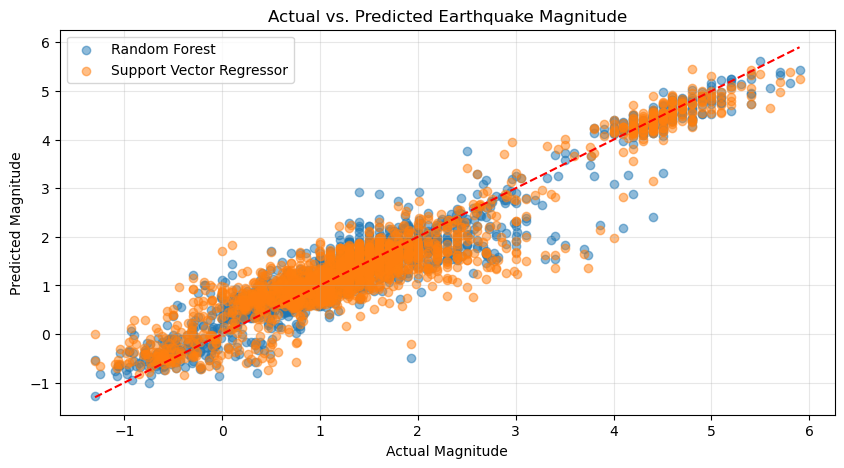

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["mag"], errors='ignore')  # Features
y = df_cleaned["mag"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
y_preds = {}  # Store predictions for visualization

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred  # Store predictions
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Accuracy metric for regression
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score (Accuracy)": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# 🎯 Bar Chart: Model Performance Comparison
plt.figure(figsize=(10, 5))
results_df["R² Score (Accuracy)"].plot(kind='bar', color=['blue', 'green'])
plt.title("Model Accuracy (R² Score) Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("R² Score (Higher is Better)")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# 🎯 Scatter Plot: Actual vs. Predicted Magnitudes
plt.figure(figsize=(10, 5))
for name, y_pred in y_preds.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect prediction line
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs. Predicted Earthquake Magnitude")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


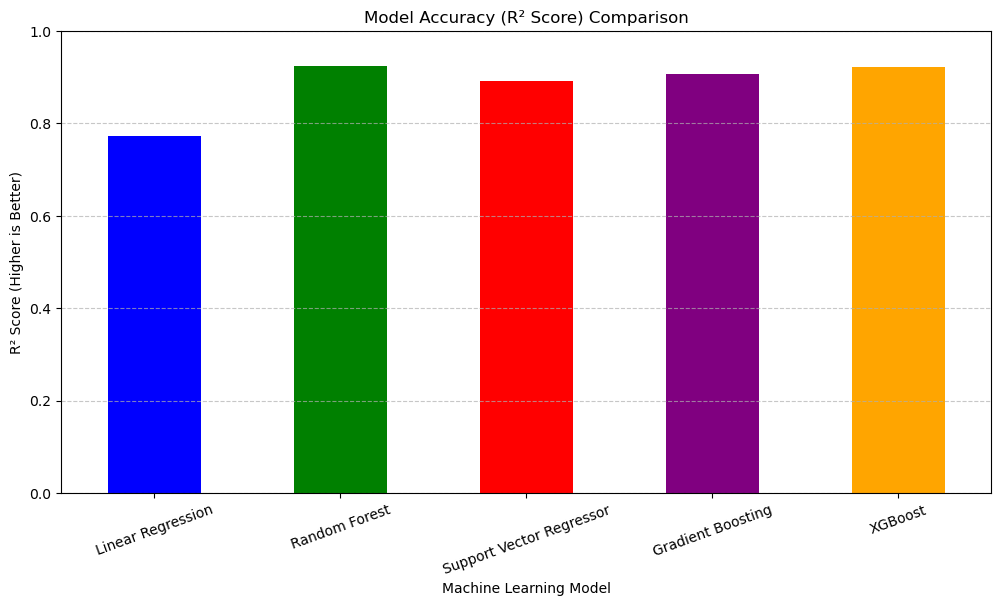

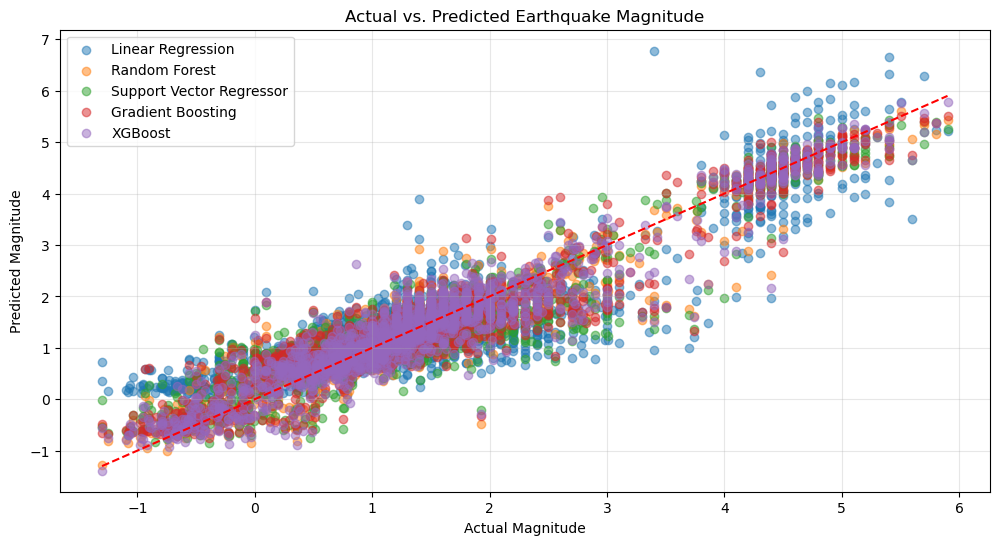

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Requires xgboost installation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["mag"], errors='ignore')  # Features
y = df_cleaned["mag"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
y_preds = {}  # Store predictions for visualization

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred  # Store predictions
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Accuracy metric for regression
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score (Accuracy)": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# 🎯 Bar Chart: Model Accuracy Comparison
plt.figure(figsize=(12, 6))
results_df["R² Score (Accuracy)"].plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy (R² Score) Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("R² Score (Higher is Better)")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# 🎯 Scatter Plot: Actual vs. Predicted Magnitudes
plt.figure(figsize=(12, 6))
for name, y_pred in y_preds.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect prediction line
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs. Predicted Earthquake Magnitude")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



📊 Model Performance Comparison:
                               MAE       MSE  R² Score (Accuracy)
Linear Regression         0.502752  0.419774             0.772303
Random Forest             0.260295  0.137736             0.925288
Support Vector Regressor  0.320219  0.198567             0.892292
Gradient Boosting         0.302503  0.170420             0.907560
XGBoost                   0.271868  0.143604             0.922105


<module 'matplotlib.pyplot' from 'c:\\Users\\Niraj\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

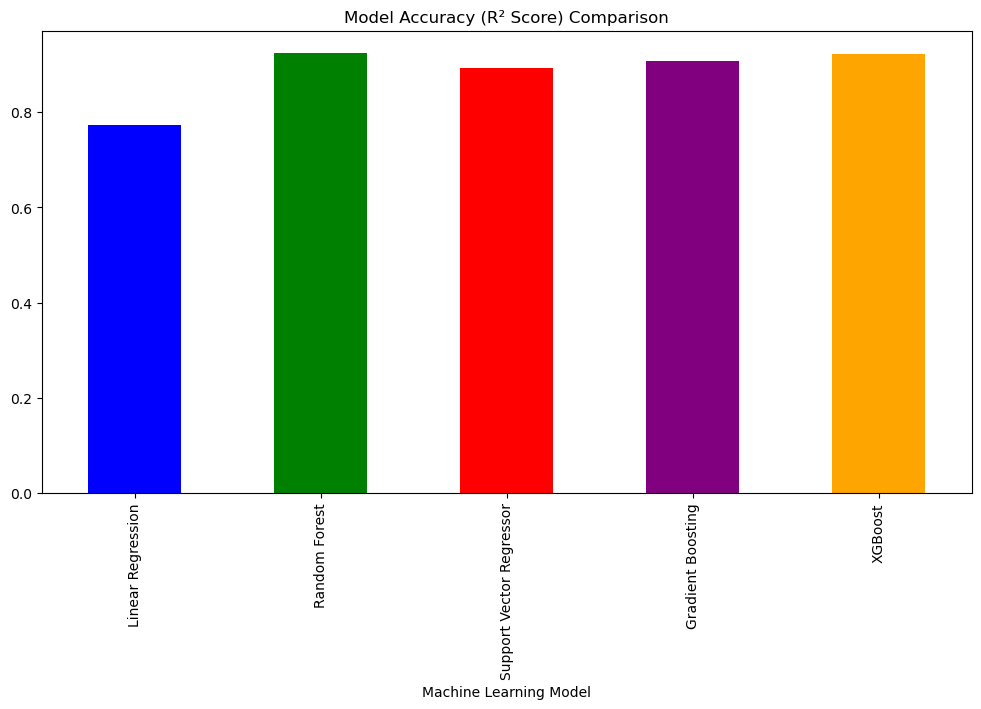

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Requires xgboost installation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["mag"], errors='ignore')  # Features
y = df_cleaned["mag"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
y_preds = {}  # Store predictions for visualization

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred  # Store predictions
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Accuracy metric for regression
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score (Accuracy)": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print the results
print("\n📊 Model Performance Comparison:")
print(results_df)

# 🎯 Bar Chart: Model Accuracy Comparison
plt.figure(figsize=(12, 6))
results_df["R² Score (Accuracy)"].plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy (R² Score) Comparison")
plt.xlabel("Machine Learning Model")
plt



📊 Model Evaluation Metrics:
✅ Accuracy: 0.9929
🎯 Precision: 0.9907
🔍 Recall: 0.9929
📌 F1 Score: 0.9918

🔍 Detailed Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         5
         Low       1.00      1.00      1.00      1619
    Moderate       0.97      0.97      0.97       204

    accuracy                           0.99      1828
   macro avg       0.66      0.66      0.66      1828
weighted avg       0.99      0.99      0.99      1828



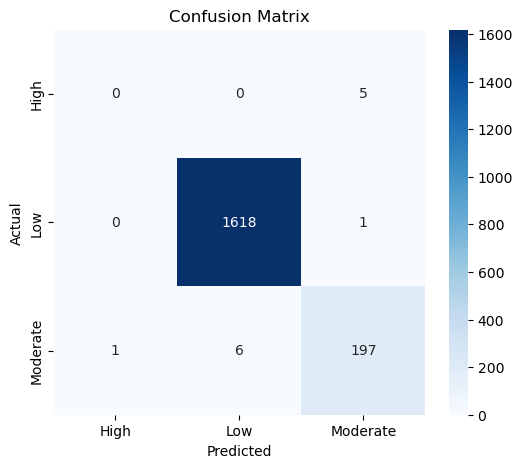

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
file_path = "all_month.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ["time", "id", "updated", "place", "net", "locationSource", "magSource", "status", "type"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Convert magnitude into categories (classification)
def categorize_magnitude(mag):
    if mag <= 3.5:
        return "Low"
    elif 3.5 < mag <= 5.5:
        return "Moderate"
    else:
        return "High"

df_cleaned["mag_category"] = df_cleaned["mag"].apply(categorize_magnitude)

# Encode the target variable
le_mag = LabelEncoder()
df_cleaned["mag_category"] = le_mag.fit_transform(df_cleaned["mag_category"])  # Encodes Low=0, Moderate=1, High=2

# Separate features and target variable
X = df_cleaned.drop(columns=["mag", "mag_category"], errors='ignore')  # Features
y = df_cleaned["mag_category"]  # Target variable (categorical)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print the results
print("\n📊 Model Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔍 Recall: {recall:.4f}")
print(f"📌 F1 Score: {f1:.4f}")

# Display classification report
print("\n🔍 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_mag.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le_mag.classes_, yticklabels=le_mag.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
